In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
import math

In [6]:
df_days = pd.DataFrame(pd.read_csv("day.csv"))
df_hours = pd.DataFrame(pd.read_csv("hour.csv"))


In [7]:
df_days.shape

(731, 16)

In [8]:
df_hours.shape

(17379, 17)

In [9]:
df_days.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [10]:
df_hours.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [11]:
df_days.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [12]:
df_hours.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
df_days.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
df_hours.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [18]:
df_days.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Instant: ID ; dteday: More like a primarykey ;  yr: not much variation, either 2011 or 2012


In [12]:
df_days = df_days.drop(['instant','dteday','yr'], axis=1)
df_hours = df_hours.drop(['instant','dteday','yr'], axis=1)  


####  season,mnth,holiday,weekday,workingday,weathersit can be converted into categorical fields instead of numerical int64 

In [15]:
# Days dataframe
df_days['season'] = df_days.season.astype('category')
df_days['mnth'] = df_days.mnth.astype('category')
df_days['holiday'] = df_days.holiday.astype('category')
df_days['weekday'] = df_days.weekday.astype('category')
df_days['workingday'] = df_days.workingday.astype('category')
df_days['weathersit'] = df_days.weathersit.astype('category')

# Months dataframe 
df_hours['season'] = df_hours.season.astype('category')
df_hours['mnth'] = df_hours.mnth.astype('category')
df_hours['hr'] = df_hours.hr.astype('category')
df_hours['holiday'] = df_hours.holiday.astype('category')
df_hours['weekday'] = df_hours.weekday.astype('category')
df_hours['workingday'] = df_hours.workingday.astype('category')
df_hours['weathersit'] = df_hours.weathersit.astype('category')

### Nulls

In [16]:
df_days.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [17]:
df_hours.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [27]:
df_days_season_mnth_DF = df_days.groupby(['season','mnth'])['cnt'].sum().reset_index()
df_days_season_mnth_DF.head(20)

,season,mnth,cnt
0,1,1,134933
1,1,2,151352
2,1,3,142065
3,1,12,42998
4,2,3,86855
5,2,4,269094
6,2,5,331686
7,2,6,230954
8,3,6,115388
9,3,7,344948


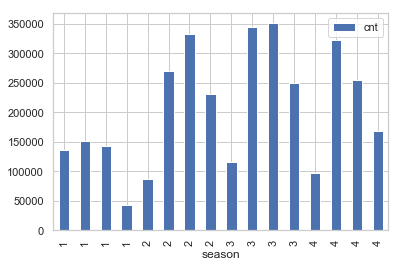

In [26]:
df_days_season_mnth_DF.plot(x="season", y=["mnth", "cnt"], kind="bar")


In [28]:
days_df_weekday = df_days.groupby(['weekday'])['cnt'].sum().reset_index()


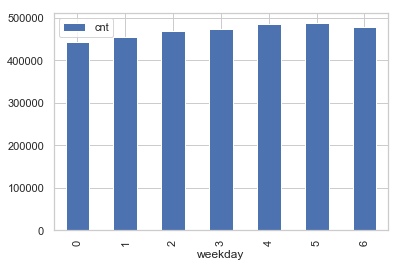

In [30]:
days_df_weekday.plot(x='weekday',y='cnt', kind="bar")


#### From the graphs above we get the distribution of the rentals

#### From the counts of rentals with respect to weekdays, slight increase in rentals occur on friday and saturday, probably due to weekend.

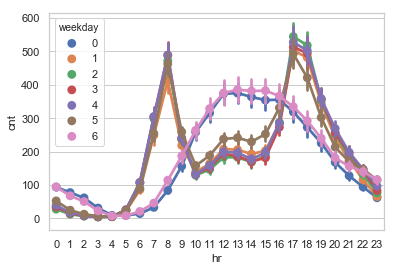

In [34]:
ax = sns.pointplot(data=df_hours[['hr','cnt','weekday']],x='hr', y='cnt',hue='weekday')


### From the graph on weekdays the rentals are more around 8 AM and in the evening from 5PM to 7PM. On weekends the rentals tend to pick up from forenoon and goes upto 6PM.

In [35]:
df_days.corr()


,instant,yr,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866025,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
yr,0.866025,1.000000,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
temp,0.150580,0.047604,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.046106,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.016375,-0.110651,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.112620,-0.011817,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.275255,0.248546,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.659623,0.594248,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,0.628830,0.566710,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


### To perform linear regression we need to eliminate multicollinearity, either by eliminating or with the help of PCA. From the above corelation matrix we could see the factor b/w temp & atemp is 1 which means they are highly corelated. Similarly registered & cnt, with respect to the target column cnt we remove casual and windspeed. 

In [36]:
df_days = df_days.drop(['atemp','registered','casual','windspeed'], axis=1)
df_days.corr()


,instant,yr,temp,hum,cnt
instant,1.000000,0.866025,0.150580,0.016375,0.628830
yr,0.866025,1.000000,0.047604,-0.110651,0.566710
temp,0.150580,0.047604,1.000000,0.126963,0.627494
hum,0.016375,-0.110651,0.126963,1.000000,-0.100659
cnt,0.628830,0.566710,0.627494,-0.100659,1.000000


In [37]:
df_hours.corr()

,instant,yr,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866014,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
yr,0.866014,1.000000,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
temp,0.136178,0.040913,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.039222,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.083546,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,-0.008740,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.158295,0.142779,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.282046,0.253684,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.278379,0.250495,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


In [38]:
# Similarly for the hours DF we remove 'atemp','registered','casual','windspeed', due to high corelation factor
df_hours = df_hours.drop(['atemp','registered','casual','windspeed'], axis=1)
df_hours.corr()


,instant,yr,temp,hum,cnt
instant,1.000000,0.866014,0.136178,0.009577,0.278379
yr,0.866014,1.000000,0.040913,-0.083546,0.250495
temp,0.136178,0.040913,1.000000,-0.069881,0.404772
hum,0.009577,-0.083546,-0.069881,1.000000,-0.322911
cnt,0.278379,0.250495,0.404772,-0.322911,1.000000


In [46]:
df_days.describe()

,instant,yr,temp,hum,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,0.495385,0.627894,4504.348837
std,211.165812,0.500342,0.183051,0.142429,1937.211452
min,1.000000,0.000000,0.059130,0.000000,22.000000
25%,183.500000,0.000000,0.337083,0.520000,3152.000000
50%,366.000000,1.000000,0.498333,0.626667,4548.000000
75%,548.500000,1.000000,0.655417,0.730209,5956.000000
max,731.000000,1.000000,0.861667,0.972500,8714.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a33a36198>,
      dtype=object)

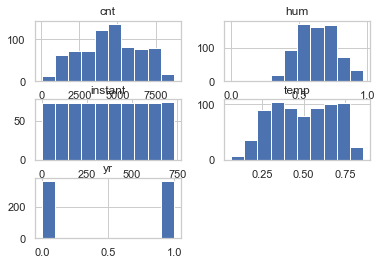

In [47]:
df_days.hist(bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3371f7f0>]],
      dtype=object)

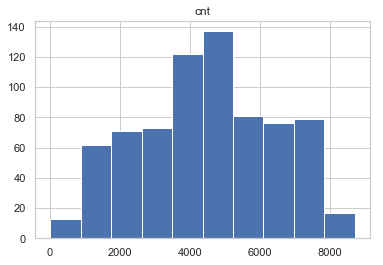

In [45]:
df_days.hist(column='cnt')

#### The cnt data is distributed normally, so there isn't any need for normalization

In [35]:
df_hours.describe()

,temp,hum,cnt
count,17379.000000,17379.000000,17379.000000
mean,0.496987,0.627229,189.463088
std,0.192556,0.192930,181.387599
min,0.020000,0.000000,1.000000
25%,0.340000,0.480000,40.000000
50%,0.500000,0.630000,142.000000
75%,0.660000,0.780000,281.000000
max,1.000000,1.000000,977.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27472278>,
      dtype=object)

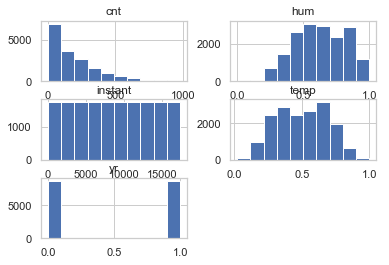

In [48]:
df_hours.hist(bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f210160>]],
      dtype=object)

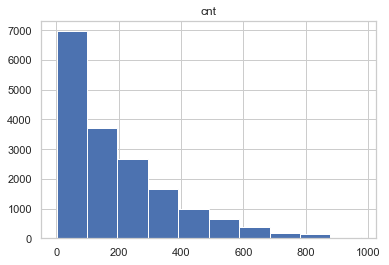

In [49]:
df_hours.hist(column='cnt')

#### The above data is skewed, so we need to normalize it before any proceedings.

In [52]:
df_hours['cnt'] = df_hours['cnt'].transform(lambda x: math.log(x))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a36417278>]],
      dtype=object)

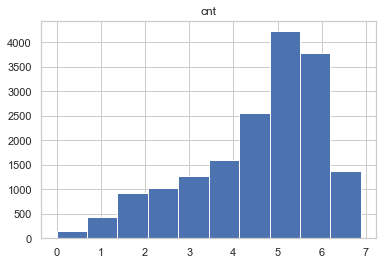

In [53]:
df_hours.hist(column='cnt')

In [54]:
temp_data = df_hours

def one_hot_encoding(df, column):       
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column, drop_first=True)],axis=1)
    df = df.drop([column], axis=1)
    return df

category_columns = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for column in category_columns:
    temp_data = one_hot_encoding(temp_data, column)
    
df_hours = temp_data

In [57]:
df_hours.head(5)

,instant,dteday,yr,temp,hum,cnt,season_2,season_3,season_4,mnth_2,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,0,0.24,0.81,2.772589,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,2011-01-01,0,0.22,0.80,3.688879,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,2011-01-01,0,0.22,0.80,3.465736,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,2011-01-01,0,0.24,0.75,2.564949,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,2011-01-01,0,0.24,0.75,0.000000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Linear Regression for target Variable "cnt" [for Hours Data Only] 

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [59]:

train_X,test_X,train_Y,test_Y =  train_test_split(df_hours[['temp','hum','season_2', 'season_3', 'season_4', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5',
       'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13',
       'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21',
       'hr_22', 'hr_23', 'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'workingday_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4']],df_hours['cnt'],test_size=0.3,random_state=5)

In [60]:
linear_model = LinearRegression()
linear_model.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
predicted=linear_model.predict(test_X)

In [62]:
mse = mean_squared_error(test_Y,predicted)
mse

0.45509133087293985

In [63]:
rmse = math.pow(mse,0.5)
rmse

0.6746045737118448

### Regression Score (R^2 (coefficient of determination)

In [64]:
r2_value = r2_score(test_Y,predicted)

In [65]:
r2_value

0.8003818343811715

Text(0, 0.5, 'count')

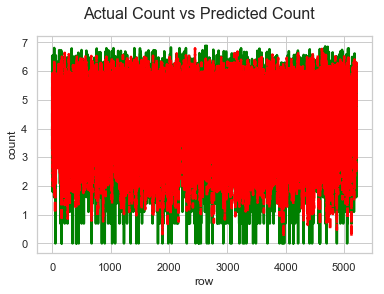

In [67]:
row = [i for i in range(0,test_Y.size)]
fig = plt.figure()
plt.plot(row,test_Y, color="green", linewidth=2.5,)
plt.plot(row,predicted, color="red",  linewidth=2.5, linestyle="--")
fig.suptitle('Actual Count vs Predicted Count', fontsize=16)
plt.xlabel('row', fontsize=12)                            
plt.ylabel('count', fontsize=12)